In [1]:
#Force the correct version of python
import sys

assert sys.version_info >=(3,7)

In [2]:
#Force the correct version of sklearn
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
from sklearn.datasets import fetch_openml
credit_g = fetch_openml('credit-g', as_frame=False)

/root/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:303: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1.
  warn(
/root/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Import the Dataset (German Credit Risk Dataset)

In [5]:
from pathlib import Path
import pandas as pd
import urllib.request
import os

def load_credit_risk_data():
    datasets_path = Path("datasets")
    datasets_path.mkdir(parents=True, exist_ok=True)
    train_path = datasets_path / "credit_risk_train.csv"
    test_path = datasets_path / "credit_risk_test.csv"

    if not train_path.is_file() or not test_path.is_file():
        url = "https://www.openml.org/data/get_csv/31/dataset_31_german.csv"
        csv_path = datasets_path / "credit_risk.csv"
        urllib.request.urlretrieve(url, csv_path)


        full_data = pd.read_csv(csv_path)
        train_data = full_data.sample(frac=0.8, random_state=42)
        test_data = full_data.drop(train_data.index)

        train_data.to_csv(train_path, index=False)
        test_data.to_csv(test_path, index=False)

    return str(train_path), str(test_path)


In [6]:
train_path, test_path = load_credit_risk_data()
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

Taking a look at the first top few rows of the training set:

In [7]:
train_data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',18,'existing paid',radio/tv,3190,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',24,none,own,1,skilled,1,none,yes,bad
1,'<0',18,'existing paid','new car',4380,'100<=X<500','1<=X<4',3,'male single',none,...,car,35,none,own,1,'unskilled resident',2,yes,yes,good
2,'<0',24,'all paid','new car',2325,'100<=X<500','4<=X<7',2,'male single',none,...,car,32,bank,own,1,skilled,1,none,yes,good
3,'>=200',12,'existing paid',radio/tv,1297,'<100','1<=X<4',3,'male mar/wid',none,...,'real estate',23,none,rent,1,skilled,1,none,yes,good
4,'no checking',33,'critical/other existing credit','used car',7253,'<100','4<=X<7',3,'male single',none,...,car,35,none,own,2,'high qualif/self emp/mgmt',1,yes,yes,good


Which features are available in the dataset?

In [8]:
print(train_data.columns.values)

['checking_status' 'duration' 'credit_history' 'purpose' 'credit_amount'
 'savings_status' 'employment' 'installment_commitment' 'personal_status'
 'other_parties' 'residence_since' 'property_magnitude' 'age'
 'other_payment_plans' 'housing' 'existing_credits' 'job' 'num_dependents'
 'own_telephone' 'foreign_worker' 'class']


The attributes have the following meaning:

* **class (target)**: Status of existing checking account, in Deutsche Mark.
* **checking_status**: Status of existing checking account, in Deutsche Mark.
* **duration**: Duration in months.
* **credit_history**: Credit history (credits taken, paid back duly, delays, critical accounts).
* **purpose**: Purpose of the credit (car, television, etc.).
* **credit_amount**: Credit amount.
* **savings_status**: Status of savings account/bonds, in Deutsche Mark.
* **employment**: Present employment, in number of years.
* **installment_commitment**: Installment rate in percentage of disposable income.
* **personal_status**: Personal status (married, single, etc.) and sex.
* **other_parties**: Other debtors / guarantors.
* **residence_since**: Present residence since X years.
* **property_magnitude**: Property (e.g., real estate).
* **age**: Age in years.
* **other_payment_plans**: Other installment plans (banks, stores).
* **housing**: Housing (rent, own, etc.).
* **existing_credits**: Number of existing credits at this bank.
* **job**: Job.
* **num_dependents**: Number of people being liable to provide maintenance for.
* **own_telephone**: Telephone (yes, no).
* **foreign_worker**: Foreign worker (yes, no).


Are there any attributes that are sometimes null?

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         800 non-null    object
 1   duration                800 non-null    int64 
 2   credit_history          800 non-null    object
 3   purpose                 800 non-null    object
 4   credit_amount           800 non-null    int64 
 5   savings_status          800 non-null    object
 6   employment              800 non-null    object
 7   installment_commitment  800 non-null    int64 
 8   personal_status         800 non-null    object
 9   other_parties           800 non-null    object
 10  residence_since         800 non-null    int64 
 11  property_magnitude      800 non-null    object
 12  age                     800 non-null    int64 
 13  other_payment_plans     800 non-null    object
 14  housing                 800 non-null    object
 15  existi

Let's take a look at the numerical attributes:

In [10]:
train_data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,21.057500,3283.976250,2.961250,2.856250,35.655000,1.397500,1.161250
std,12.318741,2791.546025,1.125314,1.111139,11.473252,0.572191,0.367991
min,4.000000,276.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1382.000000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2332.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3994.000000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

In [12]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [13]:
cat_pipeline = Pipeline([
        ("ordinal_encoder", OrdinalEncoder()),
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse_output=False)),
    ])

In [14]:
from sklearn.compose import ColumnTransformer

num_attribs = ["duration", "credit_amount", "installment_commitment", "residence_since", "existing_credits", "num_dependents"]
cat_attribs = [
    "checking_status", "credit_history", "purpose", "savings_status", "employment",
    "personal_status", "other_parties", "property_magnitude", "other_payment_plans",
    "housing", "job", "own_telephone", "foreign_worker", "class"
]

preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [15]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[-0.24835433, -0.03368565, -0.85474049, ...,  1.        ,
         1.        ,  0.        ],
       [-0.24835433,  0.39286811,  0.03445638, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.23901312, -0.34374363, -0.85474049, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.73572179, -0.82729071,  0.92365325, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.21374803,  1.68328284,  0.92365325, ...,  1.        ,
         1.        ,  0.        ],
       [-0.24835433,  1.24633407, -0.85474049, ...,  1.        ,
         1.        ,  0.        ]])

Create label

In [16]:
y_train = train_data["class"]
y_test = test_data["class"]

In [17]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [18]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = forest_clf.predict(X_test)

In [19]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

1.0

In [20]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

1.0

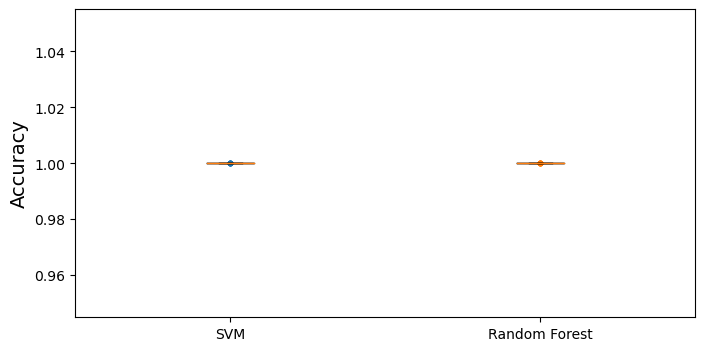

In [21]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM", "Random Forest"))
plt.ylabel("Accuracy")
plt.show()

In [22]:
#Confusion Matrix for SVM model
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv = 3)


In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_train_pred)
cm

array([[240,   0],
       [  0, 560]])

In [24]:
#precision and accuracy for SVM model
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_train_pred, pos_label='good')

1.0

In [25]:
recall_score(y_train, y_train_pred, pos_label='good')

1.0

In [26]:
#Confusion matrix for forest model
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv = 3)

In [27]:
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[240,   0],
       [  0, 560]])

In [28]:
#precision and accuracy for forest model

In [29]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_train_pred, pos_label='good')

1.0

In [30]:
recall_score(y_train, y_train_pred, pos_label='good')

1.0

Hyperparameter Tuning

In [31]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Hyperparameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200],         
    'max_depth': [10, 20],        
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4],            
    'max_features': ['sqrt', 'log2'],   
    'bootstrap': [True, False]                
}

In [32]:
# Creating the grid search object
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy',              
    verbose=2,
    n_jobs=-1                        
)


In [33]:
# Fit the grid search on the training data
grid_search_rf.fit(X_train, y_train)


Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [34]:
# Output the best parameters and the best score
print("Best hyperparameters:", grid_search_rf.best_params_)
print("Best score:", grid_search_rf.best_score_)


Best hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 1.0


In [35]:
# Use the best model for predictions
best_rf_model = grid_search_rf.best_estimator_
y_pred = best_rf_model.predict(X_test)


In [36]:
#Predictions
from sklearn.metrics import accuracy_score

# Evaluate performance
print("Accuracy on test set:", accuracy_score(y_test, y_pred))

Accuracy on test set: 1.0
